<a href="https://colab.research.google.com/github/singhayushi14470-collab/startup_dashboard.py/blob/main/svmBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# working with svm
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
import matplotlib.pyplot as plt


## working with perfectly linear datasets

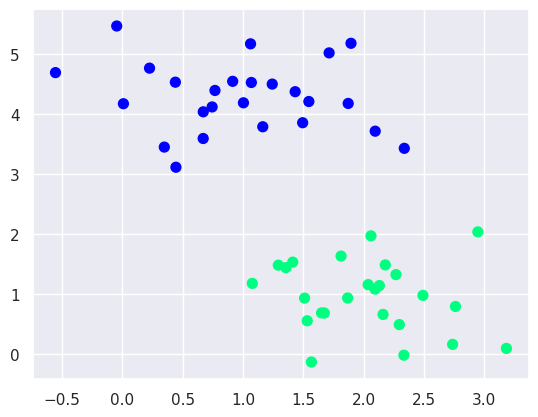

In [2]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="winter")

In [3]:
from sklearn.svm import SVC
model=SVC(kernel="linear",C=1)
model.fit(x,y)

SVC(C=1, kernel='linear')

In [21]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
  if ax is None:
    ax=plt.gca()
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()
  # create grid to evaluate model
  x=np.linspace(xlim[0],xlim[1],30)
  y=np.linspace(ylim[0],ylim[1],30)
  Y,X=np.meshgrid(y,x)
  xy=np.vstack([X.ravel(),Y.ravel()]).T
  p=model.decision_function(xy).reshape(X.shape)

  # plot decision boundary ND MARGIN
  ax.contour(X,Y,p,colors="k",
             levels=[-1,0,1],
             alpha=0.5,
             linestyles=["--","-","--"]);

  #plot support vector
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,linewidth=1,facecolor="none");
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

/tmp/ipython-input-2092324781.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


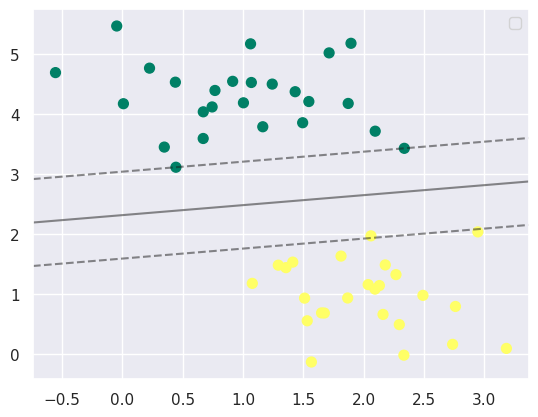

In [23]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="summer")
plot_svc_decision_function(model)
plt.legend()


# The Importance of Suport Vector

In [35]:
def plot_svm(N=10,ax=None):
  x,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.60)
  x=x[:N]
  y=y[:N]
  model=SVC(kernel="linear",C=1E10)
  model.fit(x,y)
  ax=ax or plt.gca()
  ax.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='RdBu_r')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

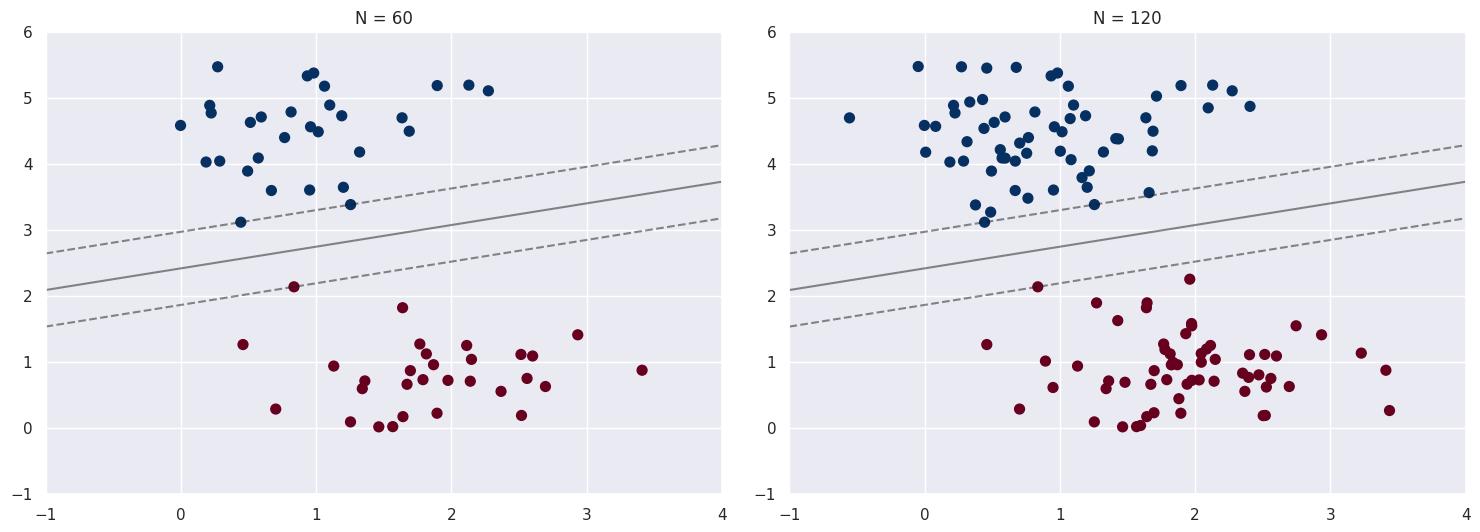

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
